First 5 rows of the dataset:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three

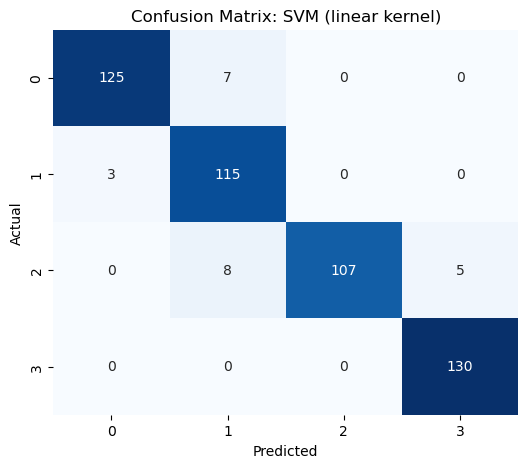


--- SVM with poly kernel ---
Accuracy: 0.774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       132
           1       0.65      0.76      0.70       118
           2       0.69      0.71      0.70       120
           3       0.91      0.81      0.85       130

    accuracy                           0.77       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.79      0.77      0.78       500



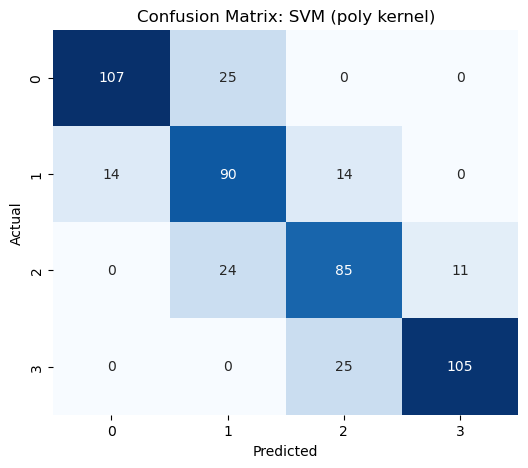


--- SVM with rbf kernel ---
Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       132
           1       0.76      0.85      0.80       118
           2       0.84      0.80      0.82       120
           3       0.94      0.92      0.93       130

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



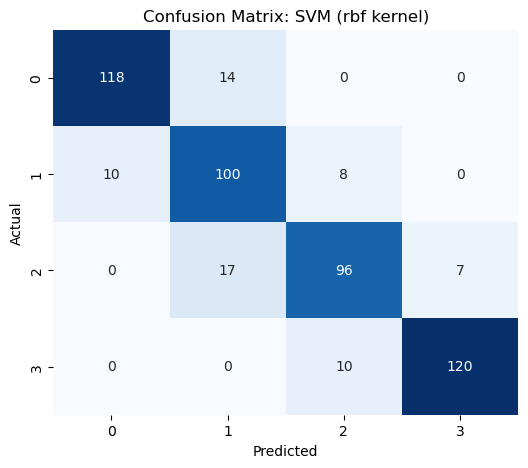


--- SVM with sigmoid kernel ---
Accuracy: 0.898
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       132
           1       0.83      0.89      0.86       118
           2       0.88      0.85      0.86       120
           3       0.93      0.95      0.94       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



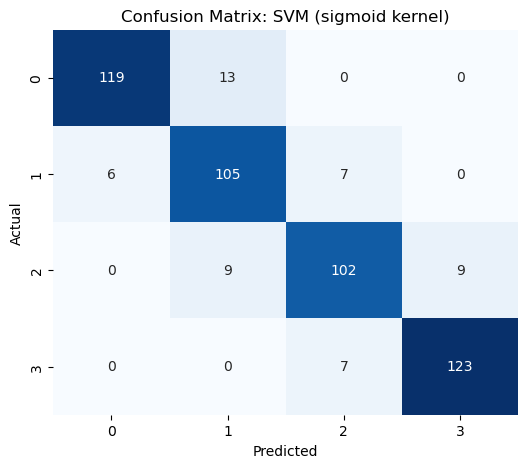

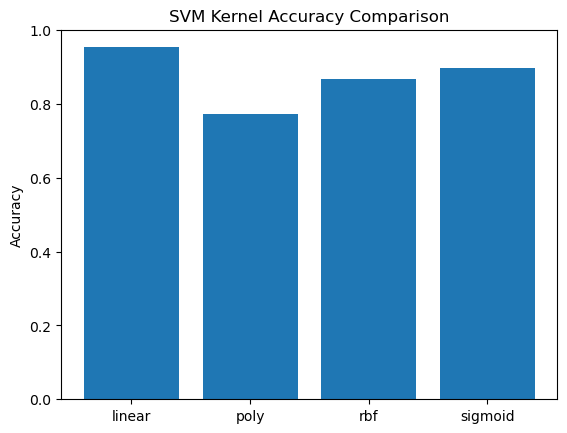


Predicted Price Range for given sample input: 2


c:\Users\sanke\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
data = pd.read_csv("train.csv")
print("First 5 rows of the dataset:\n", data.head())

# Step 3: Data Preprocessing
print("\nChecking for missing values:\n", data.isnull().sum())

# Features and target
X = data.drop('price_range', axis=1)  # target column
y = data['price_range']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Step 5: Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"\n--- SVM with {kernel} kernel ---")
    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: SVM ({kernel} kernel)")
    plt.show()

# Step 6: Compare kernel accuracies
plt.bar(results.keys(), results.values())
plt.title("SVM Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Step 7: Sample prediction (using the best-performing kernel,Linear)
sample_input = [[1500,1,1.5,1,12,0,32,0.9,180,4,16,700,1200,3000,8,6,3,1,0,1]]
sample_scaled = scaler.transform([sample_input[0]])
best_model = SVC(kernel='linear', random_state=42)
best_model.fit(X_train, y_train)
predicted_class = best_model.predict(sample_scaled)
print(f"\nPredicted Price Range for given sample input: {predicted_class[0]}")
